In [11]:
import tensorflow as tf
import pickle #load the data frame
import pandas as pd
import numpy as np
import tensorflow_addons as tfa
from tensorflow import keras
from matplotlib import pyplot as plt
from numpy import asarray
from matplotlib import image #imread

from keras.utils import to_categorical #cvonvert to binary matrix
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import models
from keras.models import Sequential
from keras.callbacks import EarlyStopping


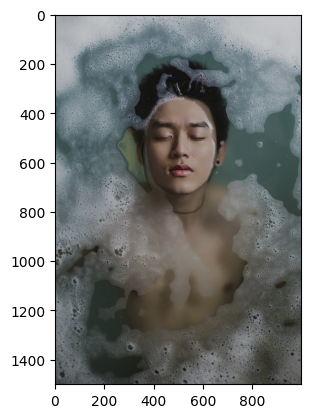

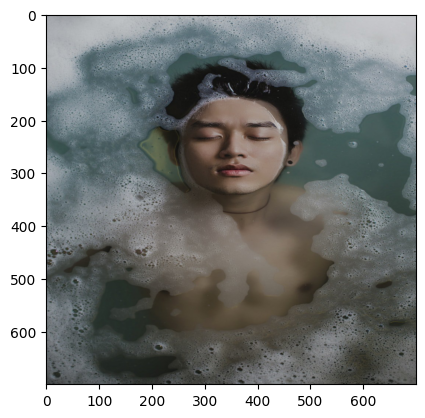

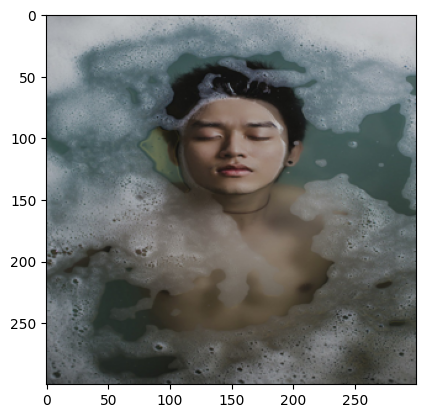

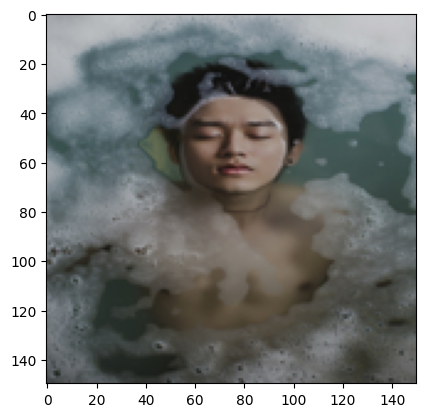

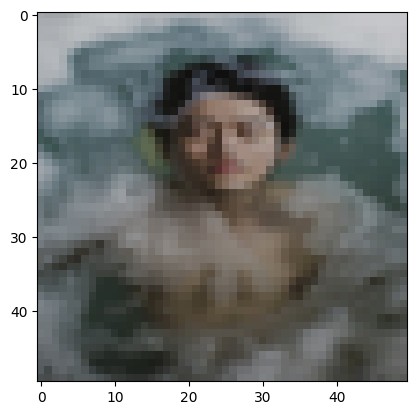

In [13]:
data = pickle.load(open("/Users/apple/Desktop/Python/Deep Learning/data_pickle_final.p", "rb"))

#creating a list of image arrays to preview
size_list = data.iloc[1][-5:]

for i in size_list:
    plt.imshow(i)
    plt.show()


In [14]:
#to make sure the images are not in a stacked order(shuffle)

#preview dataframe information
display(data.info())

#preview first 5 rows in dataframe
display(data.head())

#shuffle order of images
resampled_data = data.sample(frac=1) #return a new list
#or random.shuffle(data)
display(resampled_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Image_Links        2271 non-null   object
 1   Labels             2271 non-null   object
 2   MinMax             2271 non-null   object
 3   dtype              2271 non-null   object
 4   shape              2271 non-null   object
 5   img_data_original  2271 non-null   object
 6   img_data_700       2271 non-null   object
 7   img_data_300       2271 non-null   object
 8   img_data_150       2271 non-null   object
 9   img_data_50        2271 non-null   object
dtypes: object(10)
memory usage: 177.6+ KB


None

,Image_Links,Labels,MinMax,dtype,shape,img_data_original,img_data_700,img_data_300,img_data_150,img_data_50
0,images/shaved/0b6783812d.jpg,shaved,"(0, 255)",uint8,"(563, 1000, 3)","[[[22, 25, 14], [23, 29, 17], [27, 35, 20], [2...","[[[22, 26, 15], [25, 32, 19], [29, 42, 22], [4...","[[[21, 28, 15], [52, 66, 42], [150, 153, 123],...","[[[34, 43, 27], [131, 127, 103], [82, 78, 62],...","[[[39, 35, 29], [61, 76, 58], [54, 83, 53], [1..."
1,images/shaved/a904cf6e6c.jpg,shaved,"(0, 225)",uint8,"(1500, 1000, 3)","[[[164, 167, 172], [164, 167, 172], [163, 166,...","[[[163, 166, 171], [163, 166, 171], [162, 165,...","[[[163, 166, 171], [162, 165, 170], [162, 165,...","[[[163, 166, 171], [163, 166, 171], [161, 164,...","[[[164, 167, 172], [160, 164, 168], [161, 164,..."
2,images/shaved/73657ddb1f_.jpg,shaved,"(0, 255)",uint8,"(340, 228, 3)","[[[246, 237, 220], [247, 238, 221], [249, 240,...","[[[246, 237, 220], [246, 237, 220], [246, 237,...","[[[246, 237, 220], [247, 238, 221], [248, 239,...","[[[246, 237, 220], [248, 239, 222], [250, 241,...","[[[249, 241, 224], [250, 242, 228], [249, 242,..."
3,images/shaved/e741a01165.jpg,shaved,"(0, 255)",uint8,"(667, 1000, 3)","[[[234, 234, 234], [234, 234, 234], [234, 234,...","[[[234, 234, 234], [234, 234, 234], [234, 234,...","[[[234, 234, 234], [233, 233, 233], [233, 233,...","[[[233, 233, 233], [233, 234, 233], [235, 234,...","[[[234, 234, 234], [234, 234, 234], [235, 234,..."
4,images/shaved/f6c868fb92.jpg,shaved,"(0, 255)",uint8,"(340, 307, 3)","[[[189, 194, 214], [192, 197, 217], [195, 200,...","[[[189, 194, 214], [189, 194, 214], [191, 196,...","[[[189, 194, 214], [192, 197, 217], [195, 200,...","[[[191, 196, 216], [194, 199, 219], [181, 186,...","[[[189, 194, 214], [165, 171, 189], [127, 132,..."


,Image_Links,Labels,MinMax,dtype,shape,img_data_original,img_data_700,img_data_300,img_data_150,img_data_50
285,images/shaved/8901cc31a9.jpg,shaved,"(0, 255)",uint8,"(1920, 1440, 3)","[[[198, 189, 182], [198, 189, 182], [198, 189,...","[[[198, 189, 182], [198, 189, 182], [198, 189,...","[[[198, 189, 182], [198, 189, 182], [198, 189,...","[[[198, 189, 182], [198, 189, 182], [195, 186,...","[[[198, 189, 182], [196, 187, 180], [192, 183,..."
113,images/shaved/6004f0ff0b.jpg,shaved,"(0, 255)",uint8,"(750, 500, 3)","[[[65, 57, 36], [64, 56, 37], [63, 54, 37], [6...","[[[65, 57, 36], [65, 57, 37], [64, 56, 37], [6...","[[[64, 56, 37], [63, 54, 37], [60, 50, 38], [5...","[[[62, 53, 38], [58, 48, 38], [55, 44, 39], [5...","[[[56, 46, 39], [58, 47, 39], [65, 52, 40], [6..."
607,images/shaved/0789a092f3.jpg,shaved,"(0, 255)",uint8,"(750, 500, 3)","[[[79, 54, 34], [79, 54, 34], [79, 54, 34], [7...","[[[79, 54, 34], [79, 54, 34], [79, 54, 34], [7...","[[[79, 54, 34], [79, 54, 34], [79, 54, 34], [7...","[[[79, 54, 34], [79, 54, 34], [79, 54, 34], [7...","[[[79, 54, 34], [80, 55, 35], [80, 55, 35], [8..."
608,images/shaved/c840809f4e_.jpg,shaved,"(0, 255)",uint8,"(340, 170, 3)","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1440,images/unshaved/475941d309.jpg,unshaved,"(0, 255)",uint8,"(750, 500, 3)","[[[182, 199, 206], [181, 198, 205], [178, 195,...","[[[182, 199, 206], [182, 199, 206], [180, 197,...","[[[185, 202, 209], [182, 199, 206], [177, 194,...","[[[187, 204, 211], [181, 198, 205], [174, 192,...","[[[197, 212, 216], [192, 208, 211], [198, 214,..."


In [20]:
#Normalize the image
x = resampled_data.img_data_150
x = x/255


#create an empty tensor to store image arrays
tensor = np.zeros((x.shape[0], 150, 150, 3))

#Iterating through image arrays to update tensor
for idx, i in enumerate(x):
    tensor[idx] = i
    
#Check the tensor shape
tensor.shape

285     [[[0.7764705882352941, 0.7411764705882353, 0.7...
113     [[[0.24313725490196078, 0.20784313725490197, 0...
607     [[[0.30980392156862746, 0.21176470588235294, 0...
608     [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
1440    [[[0.7333333333333333, 0.8, 0.8274509803921568...
                              ...                        
1129    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [0.9882352...
830     [[[0.09803921568627451, 0.11764705882352941, 0...
2045    [[[0.25882352941176473, 0.27450980392156865, 0...
455     [[[0.8196078431372549, 0.7843137254901961, 0.7...
518     [[[0.30980392156862746, 0.20784313725490197, 0...
Name: img_data_150, Length: 2271, dtype: object
2271


(2271, 150, 150, 3)

In [22]:
#create list to store target codes
target = []

#iterate through labels to change strings to numbers
#label set (supervised learning)
for i in resampled_data['Labels']:
    if i == 'shaved':
        target.append(0)
    elif i == 'unshaved':
        target.append(1)

In [23]:
#update dataframe to include target
resampled_data['target'] = target

#define target variable
y = resampled_data.target

#check the shape
y.shape

(2271,)

In [27]:
#train-test-evaluation split
from sklearn.model_selection import train_test_split

#Perform train-test-split for model training
#leave 100 images for model evaluation
x_train, x_test, y_train, y_test = train_test_split(tensor[:-100], 
                                                    y[:-100], 
                                                    test_size = 0.2,
                                                    random_state=42)

for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)
    
#define hold out data for evaluation
evals_tensor = tensor[-100:]
evals_targets = y[-100:]


(1736, 150, 150, 3)
(435, 150, 150, 3)
(1736,)
(435,)


In [28]:
#build the CNN Model 
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu', input_shape=(150,150,3)))
#input imageare greater than 128x128, choose a kernel size > 3
model.add(Conv2D(64,(5,5),activation='relu', padding='same'))
model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
#the first Conv2D layer captures basic features like edges, color, size etc.
#as more layers are added, the algorithm identifies complex features from the input image
#relu activation converges much more quickly and reliably
model.add(MaxPooling2D((2,2)))
#maxpooling layer reduces the size of the convolved feature, 
#decreases computational power, extracts dominant features, and also suppresses noise
model.add(Dropout(0.3))
model.add(Conv2D(256,(5,5),activation='relu', padding='same'))
model.add(Conv2D(256,(5,5),activation='relu', padding='same'))
model.add(Conv2D(128,(5,5), activation='relu', padding='same'))
model.add(Conv2D(128,(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#because sigmoid can output from 0 to 1(shaved and unshaved)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 conv2d_17 (Conv2D)          (None, 146, 146, 64)      51264     
                                                                 
 conv2d_18 (Conv2D)          (None, 146, 146, 128)     204928    
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 128)     409728    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 128)       0         
                                                      

In [35]:
import time
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
start_time = time.time()
optimizer = Adam(learning_rate= 0.001)
model.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
# Function to define the learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Reduce the learning rate by 10%
# or can define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
#set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

#fit the model
history = model.fit(x_train, y_train,
                   batch_size=128, epochs=1000,
                   validation_data =(x_test, y_test),
                   callbacks=[reduce_lr], verbose=1)
#print training time
print("--- %s seconds ---" %(time.time()-start_time))

#evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

#check model performance by accuracy metrics
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/1000
14/14 [==============================] - 1274s 91s/step - loss: 0.6794 - accuracy: 0.5841 - val_loss: 0.6812 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 2/1000
 2/14 [===>..........................] - ETA: 17:41 - loss: 0.6813 - accuracy: 0.5781

KeyboardInterrupt: 